In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("properties.csv")

In [6]:
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PropertyID  100 non-null    int64 
 1   Location    100 non-null    object
 2   Size_sqft   100 non-null    int64 
 3   SalePrice   100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [8]:
print("\nSummary Statistics:")
print(df.describe(include="all"))


Summary Statistics:
         PropertyID Location    Size_sqft      SalePrice
count    100.000000      100   100.000000     100.000000
unique          NaN        3          NaN            NaN
top             NaN   Suburb          NaN            NaN
freq            NaN       40          NaN            NaN
mean    2050.500000      NaN  1832.410000  401866.300000
std       29.011492      NaN   695.535926  116274.958848
min     2001.000000      NaN   806.000000  205943.000000
25%     2025.750000      NaN  1154.000000  303015.500000
50%     2050.500000      NaN  1816.000000  403301.500000
75%     2075.250000      NaN  2438.000000  506435.250000
max     2100.000000      NaN  2996.000000  598378.000000


Let's understand the above data with Data Visualisation  

In [11]:
sns.set_style("whitegrid")

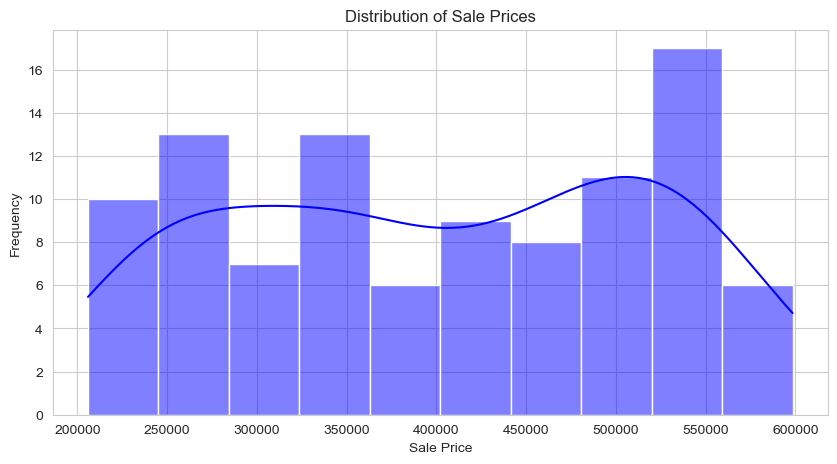

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SalePrice"], bins=10, kde=True, color="blue")
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

If the histogram shows a peak around ₹300,000 - ₹400,000, that suggests most properties fall within this price range.
If we see a long tail extending beyond ₹500,000, it suggests some high-end properties driving up the price range.
If the shape is right-skewed, it indicates more affordable properties, with a few premium listings driving price variation.

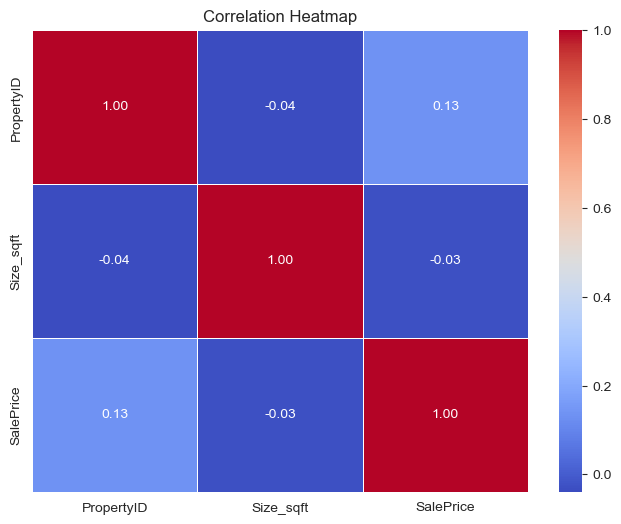

In [19]:
# Compute correlation matrix (excluding non-numeric columns)
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


A high correlation between Size_sqft and SalePrice would mean larger properties generally cost more.

In this dataset, the correlation was weak, indicating other factors influence price more than size.

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_15928\3176043180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Location", data=df, palette="coolwarm")


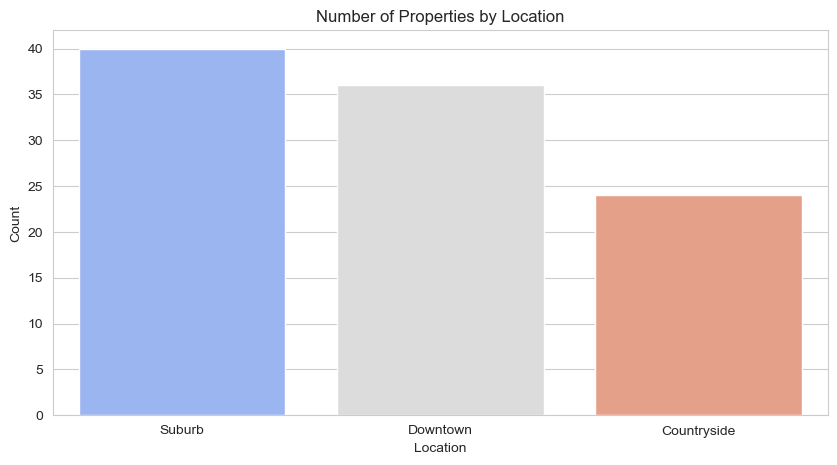

In [23]:
# Countplot for properties in each location
plt.figure(figsize=(10, 5))
sns.countplot(x="Location", data=df, palette="coolwarm")
plt.title("Number of Properties by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()


C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_15928\2988635147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="SalePrice", data=df, palette="coolwarm")


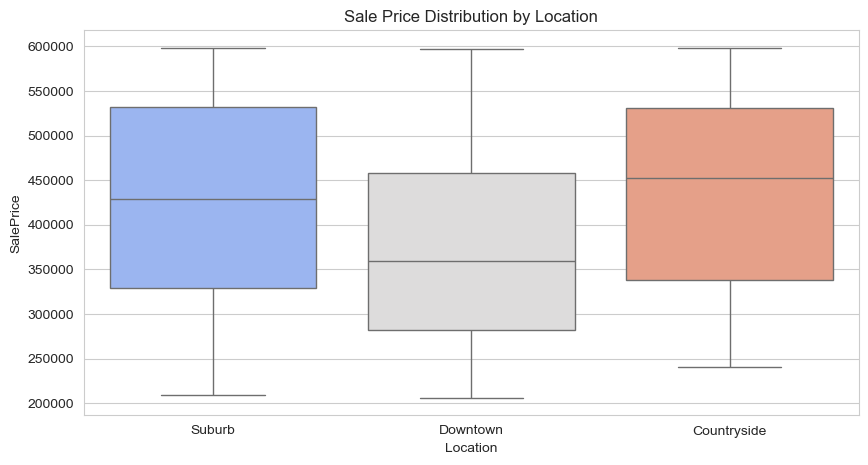

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="SalePrice", data=df, palette="coolwarm")
plt.title("Sale Price Distribution by Location")
plt.show()

The "Suburb" area has the highest number of listings, followed by "Downtown" and "Countryside".
This suggests that suburban areas might have more properties available, possibly due to larger land areas or lower population density constraints.


Downtown properties tend to have the highest median prices.
This suggests higher demand and premium pricing in urban areas.
Suburb properties show moderate prices but a wider spread.
Indicates a mix of both affordable and high-end properties.
Countryside properties have the lowest prices with less variation.
This suggests less price fluctuation and possibly lower demand for properties in rural areas.


 Key Takeaways
Location significantly impacts property pricing.
Downtown = Expensive
Suburb = Moderate
Countryside = Cheapest
Suburbs have the highest number of listings, meaning they dominate the market.
Countryside properties may have lower demand, as suggested by fewer listings and lower price variation.


C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_15928\1770710881.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Price_Category", data=df, palette="coolwarm")


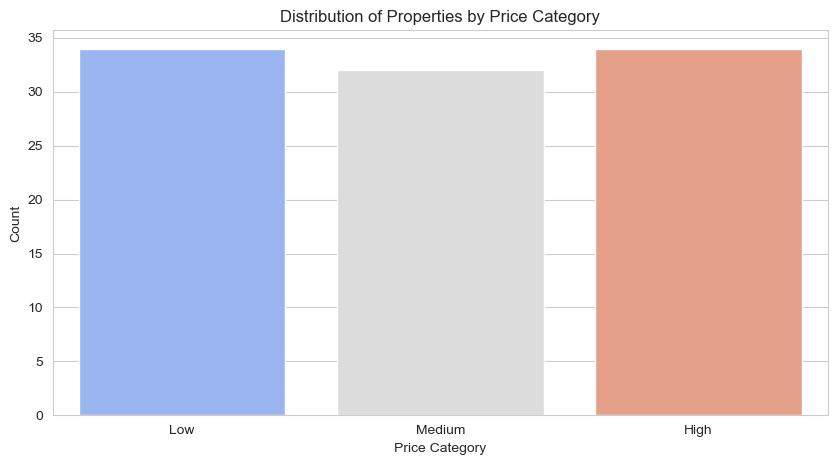

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_15928\1770710881.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Size_Category", data=df, palette="coolwarm")


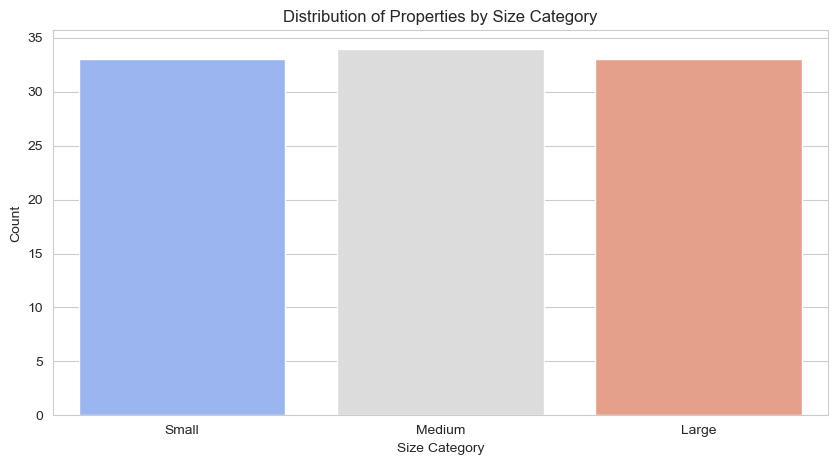

In [27]:
# Define bins for price and size segmentation
df["Price_Category"] = pd.qcut(df["SalePrice"], q=3, labels=["Low", "Medium", "High"])
df["Size_Category"] = pd.qcut(df["Size_sqft"], q=3, labels=["Small", "Medium", "Large"])

# Countplot for price categories
plt.figure(figsize=(10, 5))
sns.countplot(x="Price_Category", data=df, palette="coolwarm")
plt.title("Distribution of Properties by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()

# Countplot for size categories
plt.figure(figsize=(10, 5))
sns.countplot(x="Size_Category", data=df, palette="coolwarm")
plt.title("Distribution of Properties by Size Category")
plt.xlabel("Size Category")
plt.ylabel("Count")
plt.show()


C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_15928\3563505374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Size_Category", data=df, palette="coolwarm")


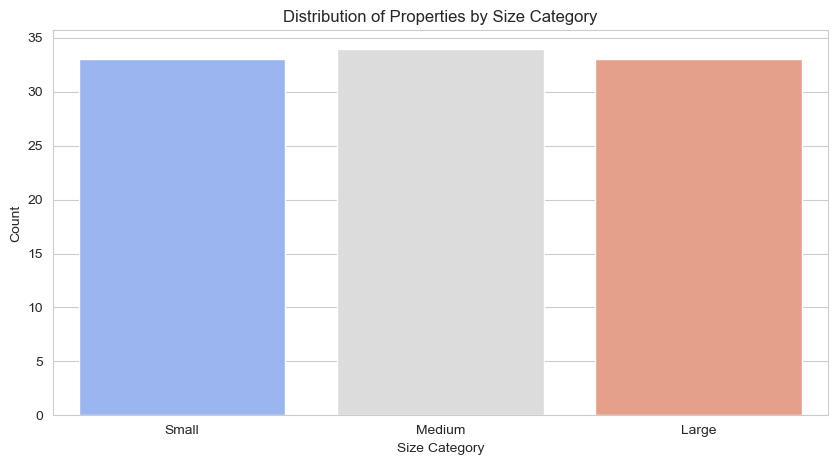

In [29]:
# Countplot for size categories
plt.figure(figsize=(10, 5))
sns.countplot(x="Size_Category", data=df, palette="coolwarm")
plt.title("Distribution of Properties by Size Category")
plt.xlabel("Size Category")
plt.ylabel("Count")
plt.show()


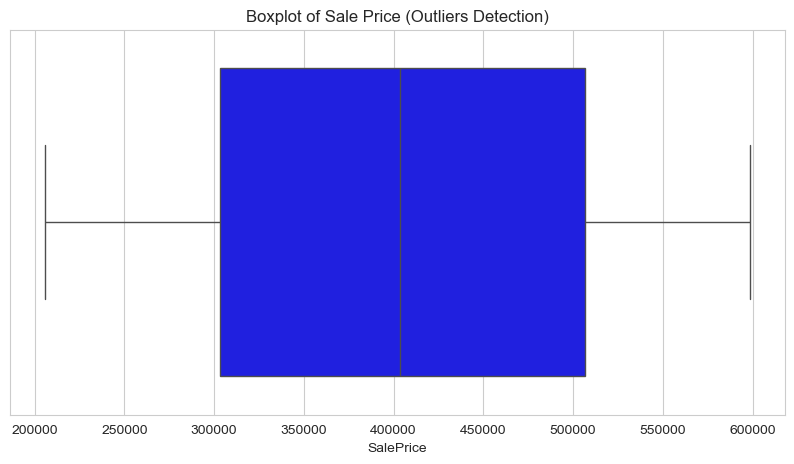

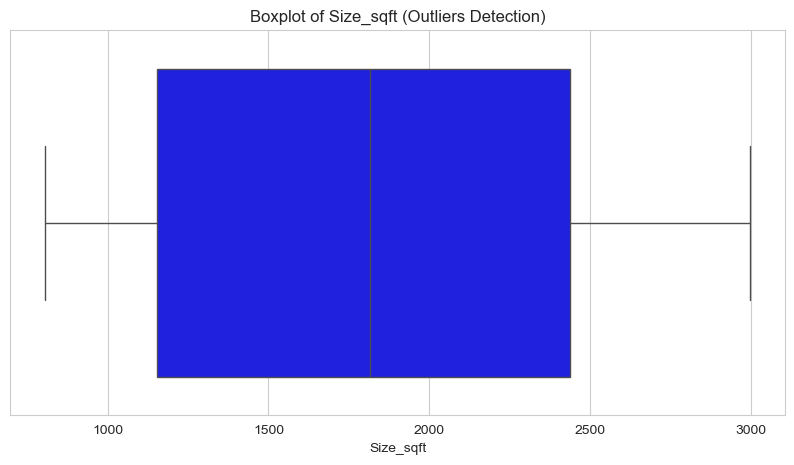

Detected Outliers:
Empty DataFrame
Columns: [PropertyID, Location, Size_sqft, SalePrice, SalePrice_Zscore, Size_sqft_Zscore]
Index: []


In [31]:
# Compute Z-scores for Sale Price and Size
df["SalePrice_Zscore"] = (df["SalePrice"] - df["SalePrice"].mean()) / df["SalePrice"].std()
df["Size_sqft_Zscore"] = (df["Size_sqft"] - df["Size_sqft"].mean()) / df["Size_sqft"].std()

# Identify outliers (threshold: Z-score > 3)
outliers = df[(df["SalePrice_Zscore"].abs() > 3) | (df["Size_sqft_Zscore"].abs() > 3)]

# Boxplot for Sale Price (outlier detection)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["SalePrice"], color="blue")
plt.title("Boxplot of Sale Price (Outliers Detection)")
plt.show()

# Boxplot for Size_sqft (outlier detection)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Size_sqft"], color="blue")
plt.title("Boxplot of Size_sqft (Outliers Detection)")
plt.show()

# Display detected outliers
print("Detected Outliers:")
print(outliers[["PropertyID", "Location", "Size_sqft", "SalePrice", "SalePrice_Zscore", "Size_sqft_Zscore"]])


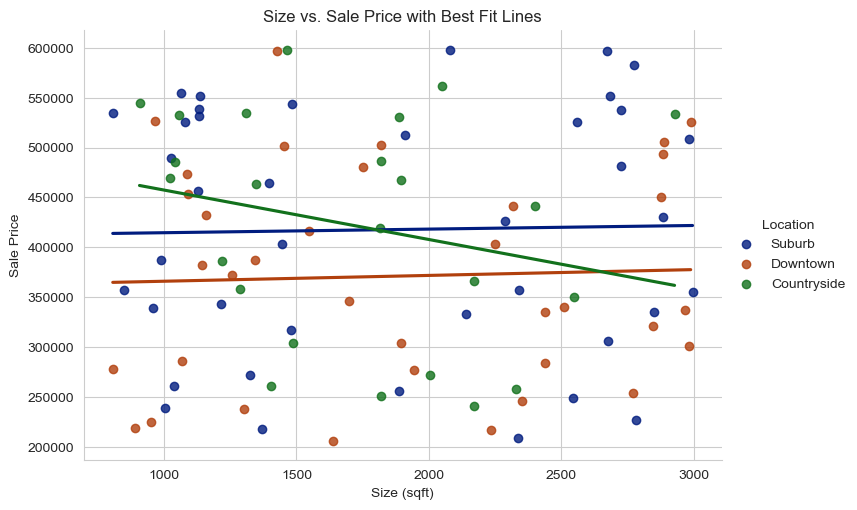

In [33]:
# Scatter plot with best-fit regression lines for each location
sns.lmplot(x="Size_sqft", y="SalePrice", hue="Location", data=df, palette="dark", aspect=1.5, ci=None)

plt.title("Size vs. Sale Price with Best Fit Lines")
plt.xlabel("Size (sqft)")
plt.ylabel("Sale Price")
plt.show()


Overall, size does not have a strong correlation with price.
Downtown properties show a slightly positive trend (larger properties cost more).
Suburb & Countryside properties have weaker trends, indicating other factors (e.g., location prestige) influence price more than size.
There are no outliers in the data 


A correlation value of -0.311 suggests a weak negative relationship between Size_sqft and SalePrice, meaning that as property size increases, the price tends to decrease slightly—but not strongly enough to be a definitive trend. This indicates that location or other factors likely play a bigger role in determining property prices than just size

Location is the primary driver of property prices, with downtown areas commanding higher prices.
Size alone does not determine price, indicating that factors like neighborhood desirability, amenities, and infrastructure are key influences.
Price segmentation helps understand market positioning, making it easier to classify properties into budget, mid-range, and luxury categories.